# Visualización con Matplotlib

## Consejos generales sobre Matplotlib

Antes de profundizar en los detalles de la creación de visualizaciones con Matplotlib, hay algunas cosas útiles que debes saber sobre el uso del paquete.

### Importando Matplotlib

Así como usamos la abreviatura ``np`` para NumPy y la abreviatura ``pd`` para Pandas, usaremos algunas abreviaturas estándar para las importaciones de Matplotlib:

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

La interfaz ``plt`` es la que usaremos con más frecuencia, como veremos a lo largo de este capítulo.

### Configuración de estilos

Usaremos la directiva ``plt.style`` para elegir los [estilos](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) estéticos apropiados para nuestras figuras.
Aquí estableceremos el estilo ``classic``, que garantiza que los gráficos que creemos utilicen el estilo clásico de Matplotlib:

In [21]:
plt.style.use('fivethirtyeight')

In [22]:
# ¿Qué estilos hay por defecto?
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


A lo largo de esta sección, ajustaremos este estilo según sea necesario.
Tenga en cuenta que las hojas de estilo utilizadas aquí son compatibles a partir de la versión 1.5 de Matplotlib; si está utilizando una versión anterior de Matplotlib, solo está disponible el estilo predeterminado.
Para obtener más información sobre las hojas de estilo, consulte [Customizing Matplotlib: Configurations and Style Sheets](https://matplotlib.org/3.3.1/tutorials/introductory/customizing.html).

### Usamos ``show()`` o no usamos ``show()``? Cómo mostrar sus parcelas

Una visualización que no se puede ver no será de mucha utilidad, pero la forma en que se ven los gráficos de Matplotlib depende del contexto.
El mejor uso de Matplotlib difiere dependiendo de cómo lo uses; aproximadamente, **los tres contextos aplicables utilizan Matplotlib en un script, en una terminal IPython o en un notebook IPython.**

#### A partir de un script

Si está utilizando Matplotlib desde un script, la función ``plt.show()`` es la sentencia adecuada.
``plt.show()`` inicia un bucle de eventos, busca todos los objetos de figuras actualmente activos y abre una o más ventanas interactivas que muestran su figura o figuras.

Entonces, por ejemplo, es posible que tenga un archivo llamado *myplot.py* que contenga lo siguiente:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

Después, puede ejecutar este script desde la línea de comandos, lo que dará como resultado que se abra una ventana con su figura mostrada:

```
$ python myplot.py
```

El comando ``plt.show()`` hace muchas tras la ejecución, ya que debe interactuar con el backend gráfico interactivo de su sistema.
Los detalles de esta operación pueden variar mucho de un sistema a otro e incluso de una instalación a otra, pero matplotlib hace todo lo posible para ocultarle todos estos detalles.

Una cosa a tener en cuenta: el comando **``plt.show()`` debe usarse *sólo una vez* por sesión de Python**, y se ve con mayor frecuencia al final del script.
Múltiples comandos ``show()`` pueden conducir a un comportamiento impredecible dependiente del backend y, en general, deben evitarse.

#### A partir de un shell IPython

Puede resultar muy conveniente utilizar Matplotlib de forma interactiva dentro de un shell IPython.
IPython está diseñado para funcionar bien con Matplotlib si especifica el modo Matplotlib.
Para habilitar este modo, puede usar el comando mágico ``%matplotlib`` después de iniciar ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

En este punto, cualquier comando de trazado ``plt`` hará que se abra una ventana de figura y se podrán ejecutar más comandos para actualizar el gráfico.
Algunos cambios (como la modificación de propiedades de líneas que ya están dibujadas) no se dibujarán automáticamente: para forzar una actualización, use ``plt.draw()``.
No es necesario usar ``plt.show()`` en modo Matplotlib.


#### A partir de un notebook IPython

El notebook IPython es una herramienta de análisis de datos interactiva basada en navegador que puede combinar narrativa, código, gráficos, elementos HTML y mucho más en un único documento ejecutable.

Se puede trazar interactivamente dentro de un cuaderno IPython con el comando ``%matplotlib`` y funciona de manera similar al shell de IPython.
En el cuaderno IPython, también tiene la opción de incrustar gráficos directamente en el cuaderno, con dos opciones posibles:

- ``%matplotlib notebook`` servirá para visualizaciones *interactivas* incrustadas dentro del notebook.
- ``%matplotlib inline`` servirá para visualizaciones *estáticas* incrustadas dentro del notebook.

Generalmente optaremos por ``%matplotlib inline``:

In [23]:
%matplotlib inline

Después de ejecutar este comando (debe hacerse solo una vez por kernel/sesión), cualquier celda dentro del notebook que cree un gráfico incrustará una imagen PNG del gráfico resultante:

In [24]:
import numpy as np

In [25]:
x = np.linspace(0, 10, 100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [26]:
y = 2 * x + 3 #funcion lineal
print(y)
# x=0 y=3
# x=1 y=5
# x=2 y=7

[ 3.          3.2020202   3.4040404   3.60606061  3.80808081  4.01010101
  4.21212121  4.41414141  4.61616162  4.81818182  5.02020202  5.22222222
  5.42424242  5.62626263  5.82828283  6.03030303  6.23232323  6.43434343
  6.63636364  6.83838384  7.04040404  7.24242424  7.44444444  7.64646465
  7.84848485  8.05050505  8.25252525  8.45454545  8.65656566  8.85858586
  9.06060606  9.26262626  9.46464646  9.66666667  9.86868687 10.07070707
 10.27272727 10.47474747 10.67676768 10.87878788 11.08080808 11.28282828
 11.48484848 11.68686869 11.88888889 12.09090909 12.29292929 12.49494949
 12.6969697  12.8989899  13.1010101  13.3030303  13.50505051 13.70707071
 13.90909091 14.11111111 14.31313131 14.51515152 14.71717172 14.91919192
 15.12121212 15.32323232 15.52525253 15.72727273 15.92929293 16.13131313
 16.33333333 16.53535354 16.73737374 16.93939394 17.14141414 17.34343434
 17.54545455 17.74747475 17.94949495 18.15151515 18.35353535 18.55555556
 18.75757576 18.95959596 19.16161616 19.36363636 19

In [27]:
np.sin(2)

0.9092974268256817

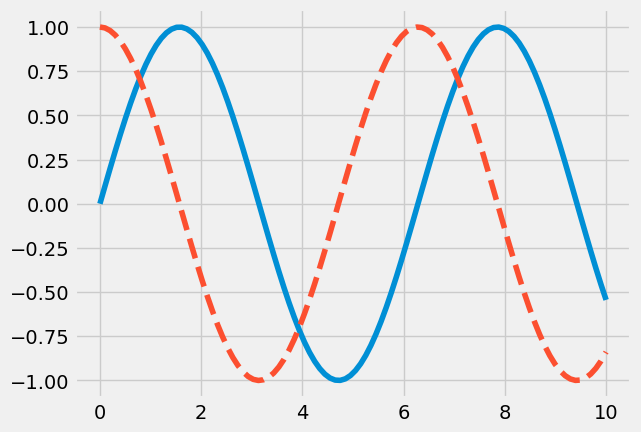

In [28]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-');
plt.plot(x, np.cos(x), '--');
#plt.plot(x, x**2, '.');

### Guardar figuras en un archivo

Una característica interesante de Matplotlib es la capacidad de guardar figuras en una amplia variedad de formatos.
Se puede guardar una figura usando el comando ``savefig()``.
Por ejemplo, para guardar la figura anterior como un archivo PNG, puedes ejecutar esto:

In [29]:
import os
os.getcwd()

'c:\\Users\\Usuario\\Documents\\Data Science BBK\\Data_Analyst\\4-Visualización\\1-Matplotlib\\Teoria'

In [30]:
fig.savefig('img/my_figure.png')

Ahora tenemos un archivo llamado ``my_figure.png`` en el directorio de trabajo actual:

In [31]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 7AD5-58E0

 Directorio de c:\Users\Usuario\Documents\Data Science BBK\Data_Analyst\4-Visualizaci�n\1-Matplotlib\Teoria

11/12/2023  18:11    <DIR>          .
11/12/2023  18:11    <DIR>          ..
11/12/2023  19:43           225.403 1-Matplotlib general.ipynb
10/12/2023  20:48            19.355 2-Line plots.ipynb
10/12/2023  20:49            14.623 3-Subplots.ipynb
10/12/2023  20:51            11.722 4-Scatter plots.ipynb
10/12/2023  20:52            12.311 5-Histograms and density.ipynb
10/12/2023  20:53            32.388 6-Legends and colors.ipynb
10/12/2023  20:55            14.811 7-Errors and contour.ipynb
11/12/2023  18:11    <DIR>          data
11/12/2023  19:27    <DIR>          img
               7 archivos        330.613 bytes
               4 dirs  380.449.345.536 bytes libres


Para confirmar que lo contiene lo que creemos que contiene, usamos el objeto ``Image`` de IPyhton para mostrar el contenido de este archivo:

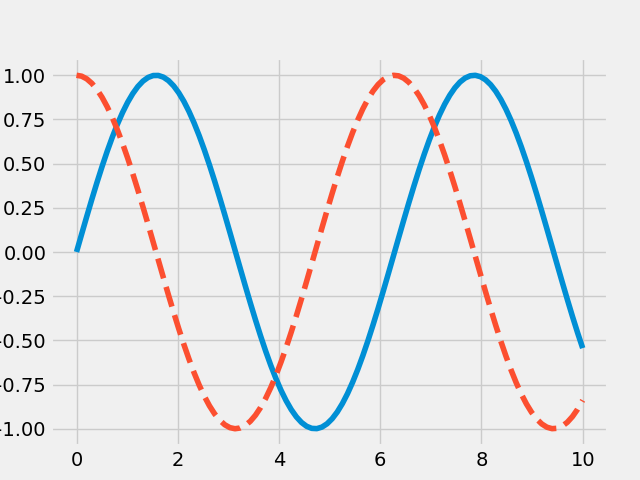

In [32]:
from IPython.display import Image
Image('img/my_figure.png')

En ``savefig()``, el formato del archivo se deduce de la extensión del nombre del archivo dado.
Dependiendo de los backends que haya instalado, hay muchos formatos de archivo diferentes disponibles.
La lista de tipos de archivos admitidos se puede encontrar para su sistema utilizando el siguiente método del objeto de lienzo de figura:

In [33]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Tenga en cuenta que al guardar su figura, no es necesario utilizar ``plt.show()`` ni los comandos relacionados discutidos anteriormente.

## Dos interfaces por el precio de una

Una característica potencialmente confusa de Matplotlib son sus interfaces duales: una interfaz basada en stilo MATLAB y una interfaz más potente orientada a objetos. Destacaremos rápidamente las diferencias entre los dos aquí.

#### Interfaz estilo MATLAB

**Matplotlib se escribió originalmente como una alternativa de Python para usuarios de MATLAB** y gran parte de su sintaxis refleja ese hecho.
Las herramientas de estilo MATLAB están contenidas en la interfaz pyplot (``plt``).
Por ejemplo, el siguiente código probablemente les resultará bastante familiar a los usuarios de MATLAB:

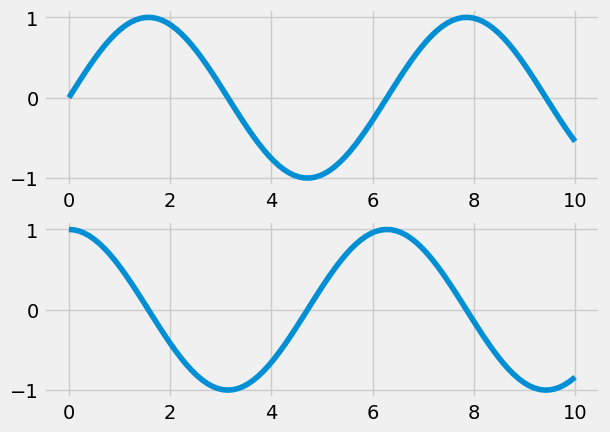

In [34]:
plt.figure()

plt.subplot(2, 1, 1) # filas, columnas, posición
plt.plot(x, np.sin(x))


plt.subplot(2, 1, 2) # filas, columnas, posición
plt.plot(x, np.cos(x))


Es importante tener en cuenta que esta interfaz es un *estado*: realiza un seguimiento de la figura y los ejes **"actuales", que es donde se aplican todos los comandos ``plt``.**
Puede obtener una referencia a estos usando las rutinas ``plt.gcf()`` (obtener la figura actual) y ``plt.gca()`` (obtener los ejes actuales).

Si bien esta interfaz con estado es rápida y conveniente para gráficos simples, es fácil tener problemas.
Por ejemplo, una vez creado el segundo panel, ¿cómo podemos volver atrás y agregar algo al primero?
Esto es posible dentro de la interfaz estilo MATLAB, pero un poco complicado.
Afortunadamente, hay una manera mejor.

#### Interfaz orientada a objetos

La interfaz orientada a objetos está disponible para estas situaciones más complicadas y para cuando quieras tener más control sobre tu figura.
En lugar de depender de alguna noción sobre figura o ejes "activos", en la interfaz orientada a objetos las funciones de trazado son *métodos* de objetos explícitos ``Figure`` y ``Axes``.
Para recrear el gráfico anterior utilizando este estilo de visualización, puede hacer lo siguiente:

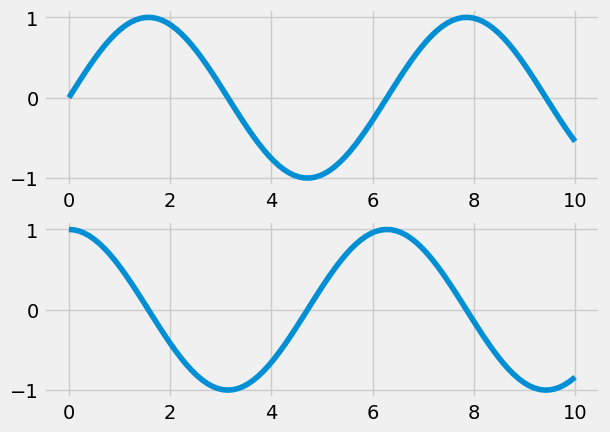

In [35]:
# Primero creamos la 'red'-'malla' de las gráficas.
# ax será un array de dos objetos de Axes.
fig, ax = plt.subplots(2) #siempre se usa el nombre fig y el nombre ax (de las palabras figura y ejes)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

In [20]:
fig.savefig('img/prueba.png')

Para visualizaciones más simples, la elección de qué estilo usar es en gran medida una **cuestión de preferencia, pero el enfoque orientado a objetos puede convertirse en una necesidad a medida que las visualizaciones se vuelven más complicadas.**
A lo largo de este capítulo, cambiaremos entre las interfaces estilo MATLAB y las orientadas a objetos, dependiendo de lo que sea más conveniente.
En la mayoría de los casos, la diferencia es tan pequeña como cambiar ``plt.plot()`` por ``ax.plot()``, pero hay algunos errores que resaltaremos a medida que aparezcan en las siguientes secciones.